In [1]:
pip install --user tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [21]:
#libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
stockname=input("enter your stock name") 
start_day=input("enter your staring date (yyyy-mm-dd)")
end_day=input("enter your ending date (yyyy-mm-dd)")

enter your stock namesbin.ns
enter your staring date (yyyy-mm-dd)2021-01-01
enter your ending date (yyyy-mm-dd)2021-12-01


In [24]:
df = web.DataReader(stockname, data_source='yahoo',start=start_day,end=end_day)
#Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,280.000000,274.399994,274.899994,279.399994,24531791.0,276.844025
2021-01-04,283.899994,277.750000,281.850006,281.049988,31450608.0,278.478912
2021-01-05,282.450012,277.000000,278.049988,281.750000,27393072.0,279.172546
2021-01-06,289.149994,281.399994,283.000000,285.049988,40765708.0,282.442322
2021-01-07,291.799988,287.000000,289.000000,287.700012,30546600.0,285.068115
...,...,...,...,...,...,...
2021-11-22,506.000000,477.500000,506.000000,486.399994,28800269.0,486.399994
2021-11-23,495.399994,480.000000,485.250000,493.049988,20000371.0,493.049988
2021-11-24,500.000000,489.049988,495.799988,493.149994,13963769.0,493.149994


In [25]:
#Get Number rows and colums
df.shape

(222, 6)

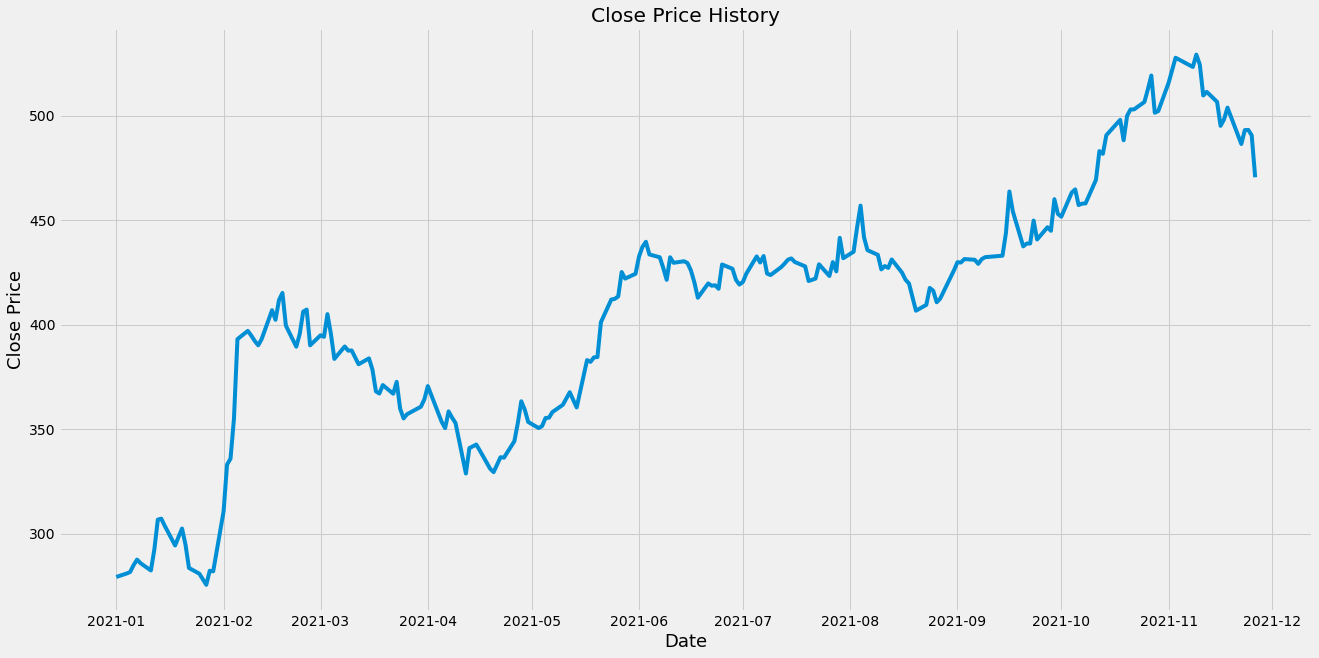

In [26]:
#Graph of closing price
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

<AxesSubplot:xlabel='Date'>

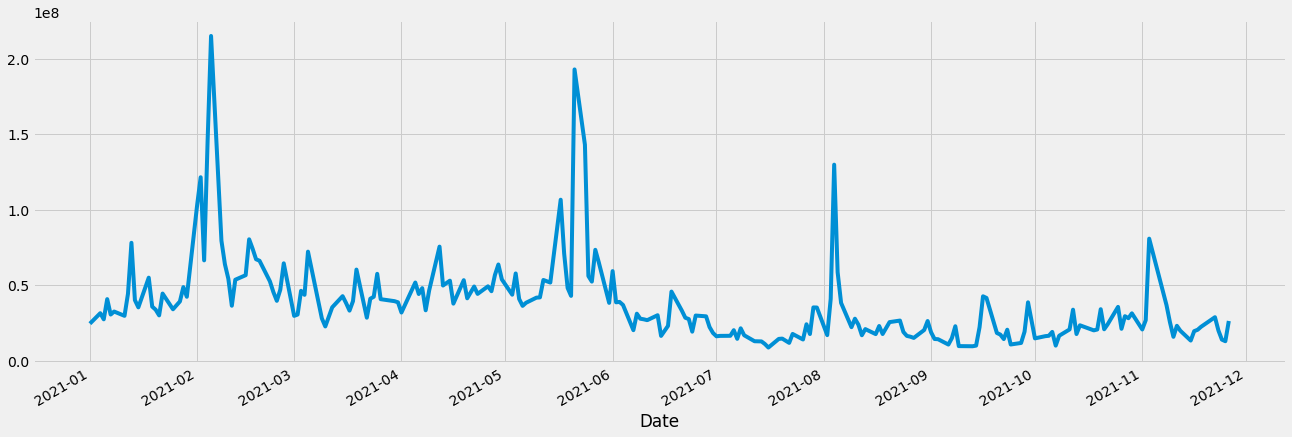

In [27]:
df['Volume'].plot(figsize=(20,7))

In [28]:
df['Total Traded'] = df['Open'] * df['Volume']

<AxesSubplot:xlabel='Date'>

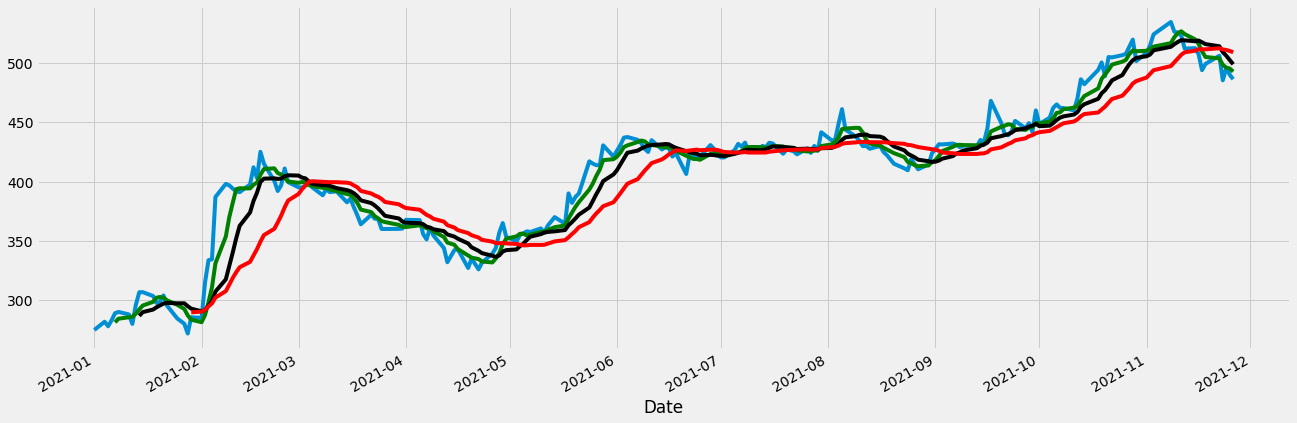

In [29]:
#moving avarage
df['Open'].plot(label = 'No Moving Average', figsize=(20,7))
df['MA5'] = df['Open'].rolling(5).mean()
df['MA5'].plot(color='green')
df['MA10'] = df['Open'].rolling(10).mean()
df['MA10'].plot(color='black')
df['MA20'] = df['Open'].rolling(20).mean()
df['MA20'].plot(color='red')

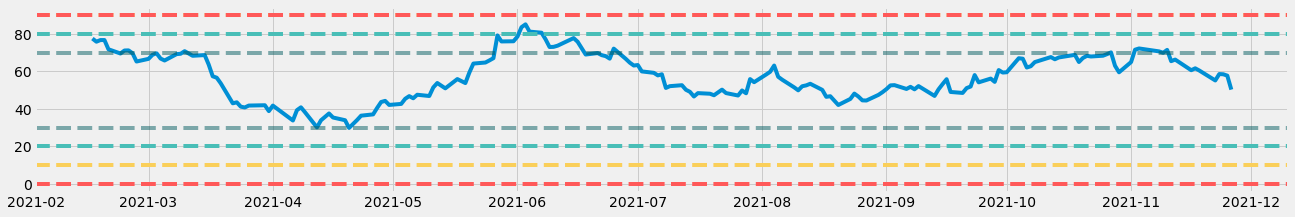

In [32]:
#relative strength index
delta = df['Adj Close'].diff(1)
delta.dropna(inplace= True)

pos = delta.copy()
neg = delta.copy()

pos[pos<0]=0
neg[neg>0]=0

days = 30

avg_gain = pos.rolling(days).mean()
avg_loss = abs(neg.rolling(days).mean())

rel_strength = avg_gain/avg_loss

RSI = 100.0-(100.0/(1.0+rel_strength))

df['RSI'] = RSI

plt.figure(figsize=(20,7))

rsi = plt.subplot(212)
rsi.plot(df.index, df['RSI'])

rsi.axhline(0,linestyle='--', color='#ff5959')
rsi.axhline(10,linestyle='--', color='#facf5a')
rsi.axhline(20,linestyle='--', color='#49beb7')
rsi.axhline(30,linestyle='--', alpha = 0.5, color='#085f63')
rsi.axhline(70,linestyle='--', alpha = 0.5, color='#085f63')
rsi.axhline(80,linestyle='--', color='#49beb7')
rsi.axhline(90,linestyle='--', color='#facf5a')
rsi.axhline(90,linestyle='--', color='#ff5959')

rsi.grid(True)
rsi.set_axisbelow(True)
rsi.tick_params(axis='x', color='white')
rsi.tick_params(axis='y', color='white')

In [33]:
#Create data frame from close
data = df.filter(['Close'])
#dataframe to array
dataset = data.values
#Number of rows to train
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

178

In [34]:
 #scale data
 scaler = MinMaxScaler(feature_range=(0,1))
 scaled_data = scaler.fit_transform(dataset)
 scaled_data

array([[0.0147929 ],
       [0.02130175],
       [0.02406314],
       [0.03708084],
       [0.04753458],
       [0.04082842],
       [0.02702172],
       [0.06646944],
       [0.12287965],
       [0.12465484],
       [0.11124264],
       [0.0741618 ],
       [0.09053258],
       [0.10611436],
       [0.07573968],
       [0.03175549],
       [0.02090737],
       [0.        ],
       [0.02643003],
       [0.02544383],
       [0.13826436],
       [0.22662724],
       [0.23786987],
       [0.31341224],
       [0.4633136 ],
       [0.47889538],
       [0.47001964],
       [0.45996052],
       [0.45167647],
       [0.46351079],
       [0.51794873],
       [0.49980275],
       [0.53688359],
       [0.5504931 ],
       [0.48875731],
       [0.4491124 ],
       [0.47317553],
       [0.51518734],
       [0.51913211],
       [0.45167647],
       [0.47061146],
       [0.46765288],
       [0.51045356],
       [0.47337272],
       [0.42603545],
       [0.4495069 ],
       [0.44161735],
       [0.442

In [35]:
#train dataset
#scale train data set
train_data = scaled_data[0:training_data_len,:]
#split data in x and y
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.0147929 , 0.02130175, 0.02406314, 0.03708084, 0.04753458,
       0.04082842, 0.02702172, 0.06646944, 0.12287965, 0.12465484,
       0.11124264, 0.0741618 , 0.09053258, 0.10611436, 0.07573968,
       0.03175549, 0.02090737, 0.        , 0.02643003, 0.02544383,
       0.13826436, 0.22662724, 0.23786987, 0.31341224, 0.4633136 ,
       0.47889538, 0.47001964, 0.45996052, 0.45167647, 0.46351079,
       0.51794873, 0.49980275, 0.53688359, 0.5504931 , 0.48875731,
       0.4491124 , 0.47317553, 0.51518734, 0.51913211, 0.45167647,
       0.47061146, 0.46765288, 0.51045356, 0.47337272, 0.42603545,
       0.4495069 , 0.44161735, 0.44201185, 0.41597633, 0.42702164,
       0.40591709, 0.36489147, 0.36074951, 0.37672579, 0.36035501,
       0.38284026, 0.33214991, 0.31380674, 0.32169629, 0.33589737])]
[0.349704075835751]

[array([0.0147929 , 0.02130175, 0.02406314, 0.03708084, 0.04753458,
       0.04082842, 0.02702172, 0.06646944, 0.12287965, 0.12465484,
       0.11124264, 0.0741618 , 0.0905

In [36]:
#convert x and y to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
#reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(118, 60, 1)

In [55]:
#LSTM model
model = Sequential()
model.add(LSTM(50 ,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50 ,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 12)                612       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 31,225
Trainable params: 31,225
Non-trainable params: 0
_________________________________________________________________


In [57]:
#Compile 
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [67]:
#train
model.fit(x_train, y_train, batch_size=1, epochs=1)

118/118 [==============================] - 2s 19ms/step - loss: 0.0034


In [68]:
#test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [69]:
#Conver data to array
x_test = np.array(x_test)

In [70]:
#reshape 2d to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [71]:
#Predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [72]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.3181415904652

C:\Users\HP\AppData\Local\Temp/ipykernel_3920/3008751712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


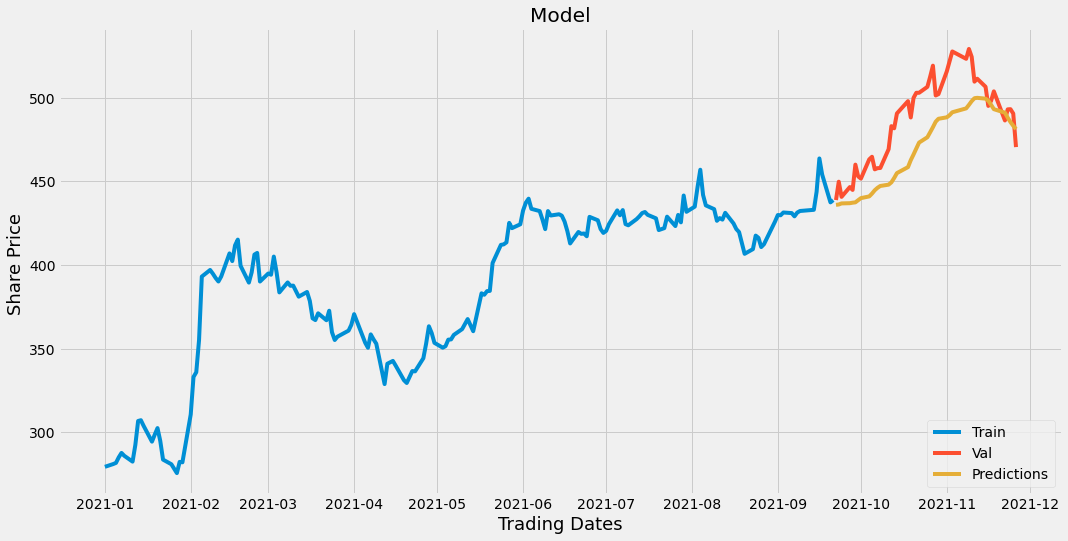

In [73]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Trading Dates', fontsize = 18)
plt.ylabel('Share Price ', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [74]:
#valid and predicted price
valid

,Close,Predictions
Date,,
2021-09-22,438.850006,435.979279
2021-09-23,449.799988,436.185822
2021-09-24,440.750000,436.829193
2021-09-27,446.600006,436.964783
2021-09-28,444.899994,437.259338
2021-09-29,460.000000,437.473206
2021-09-30,453.000000,438.753754
2021-10-01,451.649994,439.986633
2021-10-04,463.149994,441.018250


In [75]:
aq = web.DataReader(stockname, data_source='yahoo',start=start_day,end=end_day)
new_df = aq.filter(['Close'])
last_60_days = new_df[-60:].values 
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[478.0504]]
